In [1]:
from kneed import DataGenerator, KneeLocator
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os
import scipy.io
import json
import numpy as np
from format_data import *
from utils import *
import pickle

In [2]:
t_pre = 0.2#0.2
t_post = 0.50#0.300
bin_width = 0.005
# Créer les bins de temps"
psth_bins = np.arange(-t_pre, t_post, bin_width)
#gc = np.arange(0, 32)

In [88]:
path = '/auto/data2/eTheremin/ALTAI/ALTAI_20240712_SESSION_00/'

In [85]:
tt_path = path+'headstage_0/tt.pkl'
with open(tt_path, 'rb') as file:
    tt = pickle.load(file)

In [90]:
tt['block']

KeyError: 'block'

In [89]:
print(len(tt['tones']), len(tt['triggers']))

10184 10184


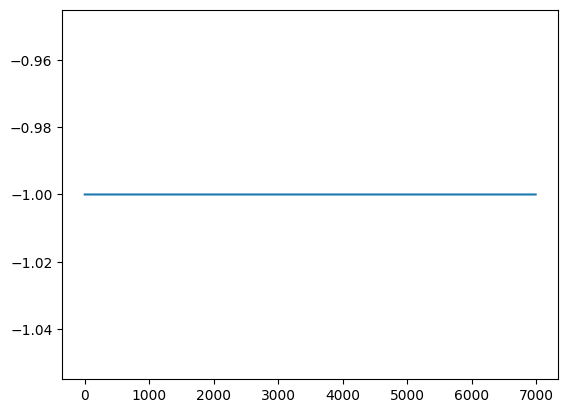

In [67]:
condition = [x for x in tt['condition']]

plt.plot(condition)

In [68]:
data = np.load(path+'headstage_0/data_0.005.npy', allow_pickle=True)
features = np.load(path+'headstage_0/features_0.005.npy', allow_pickle=True)
gc = np.load(path+'headstage_0/good_clusters.npy', allow_pickle=True)
#gc = np.arange(0, 32)
#frequences = np.load(path+'headstage_0/unique_tones.npy', allow_pickle=True)
#heatmaps = np.load(path+'headstage_0/heatmap_plot_playback.npy', allow_pickle=True)

In [77]:
data_corrected = data.astype(float)

# Remplacer les valeurs > 10 par NaN
data_corrected[data_corrected > 9] = np.nan

In [70]:
n = int(len(features)/2)

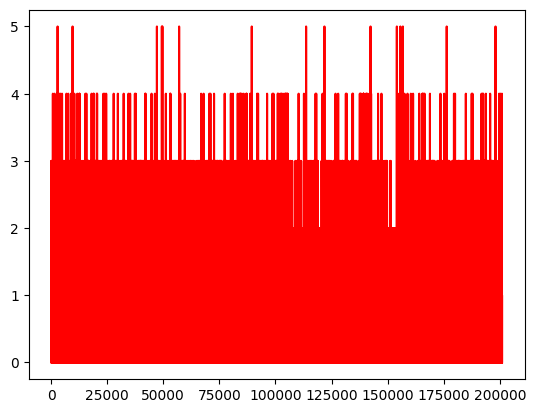

In [71]:
plt.plot(data[26][0:n], c = 'red')


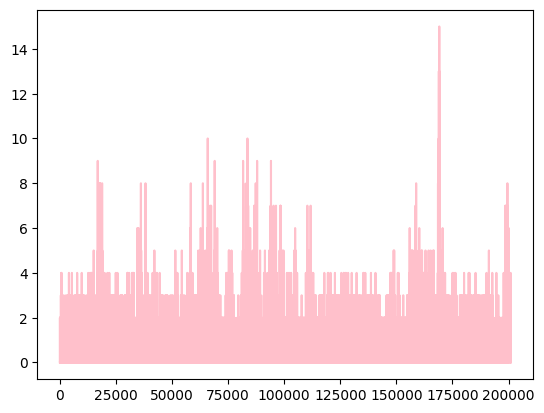

In [72]:
plt.plot(data[26][n:], c = 'pink')

In [42]:
tracking = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tracking')
playback = get_psth(data, features, t_pre, t_post, bin_width, gc, 'playback')
tail = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tail')

In [6]:
len(features)

338574

In [78]:

data_r = data[:, :n]
features_r = features[:n]

In [79]:
data_residuel = data[:,n:]
features_residuel = features[n:]
data_residuel = data_residuel.astype(float)
data_residuel[data_residuel > 9] = np.nan

In [80]:
tail = get_psth(data_r, features_r, t_pre, t_post, bin_width, gc, 'tail')
tail_residuel = get_psth(data_residuel, features_residuel, t_pre, t_post, bin_width, gc, 'tail')

/tmp/ipykernel_198445/1578114615.py:11: RuntimeWarning: Mean of empty slice
  axes[row, col].plot(psth_bins, np.nanmean(tail[cluster], axis=0), c = 'red', label = 'tracking')


ValueError: x and y must have same first dimension, but have shapes (140,) and (1,)

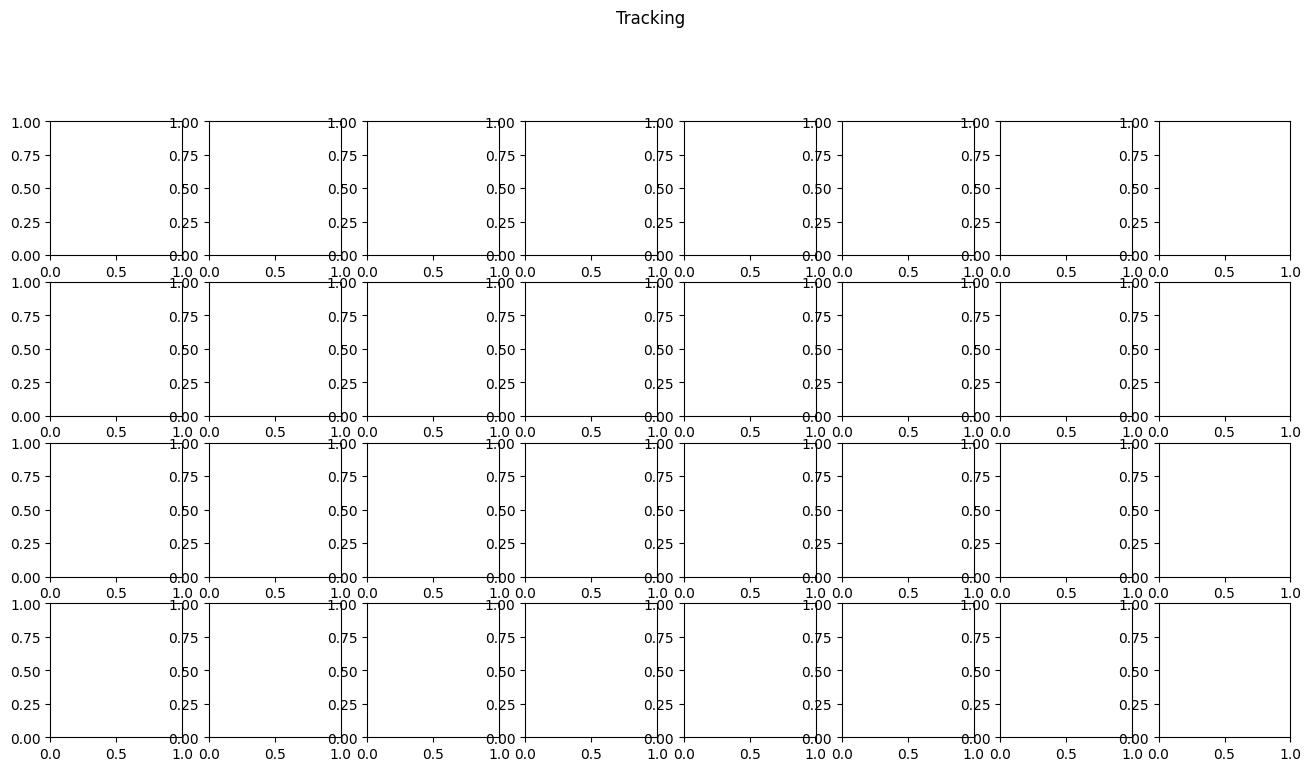

In [81]:
# Tracking vs Playback
# pour plot cluster par cluster16
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('Tracking', y=1.02)
plt.subplots_adjust() 
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)
psth_bins = np.arange(-t_pre, t_post, bin_width)
for cluster in range(num_plots):
    if cluster < num_plots: 
        row, col = get_plot_coords(cluster)
        axes[row, col].plot(psth_bins, np.nanmean(tail[cluster], axis=0), c = 'red', label = 'tracking')
        axes[row, col].plot(psth_bins, np.nanmean(tail_residuel[cluster], axis=0), c = 'pink', label = 'tracking residuel')
        axes[row, col].axvline(0, c = 'grey', linestyle='--')
        axes[row, col].set_title(f'Cluster {cluster}')
        axes[row, col].spines['top'].set_visible(False)
        axes[row, col].spines['right'].set_visible(False)

In [48]:
c = data[26]
print(len(c))

338574


In [51]:
plt.plot(c[:n])

NameError: name 'n' is not defined

In [75]:
c27_0 = c27[0:int(n/4)]
c27_1 = c27[int(n/4):int(n/4)*2]
c27_2 = c27[2*int(n/4):3*int(n/4)]
c27_3 = c27[3*int(n/4):]

In [77]:
c27_3

[array([0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

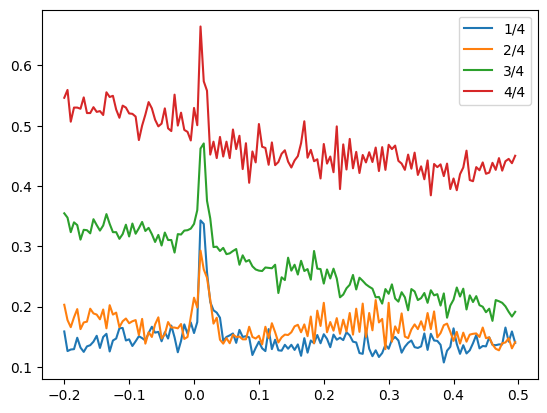

In [80]:
plt.plot(psth_bins, np.nanmean(c27_0, axis=0), label = '1/4')
plt.plot(psth_bins, np.nanmean(c27_1, axis=0), label = '2/4')
plt.plot(psth_bins, np.nanmean(c27_2, axis=0), label = '3/4')
plt.plot(psth_bins, np.nanmean(c27_3, axis=0), label = '4/4')
plt.legend()

In [59]:
tail = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tail')
tracking = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tracking')
#mc = get_psth(data, features, t_pre, t_post, bin_width, gc, 'mapping change')
playback = get_psth(data, features, t_pre, t_post, bin_width, gc, 'playback') 

Text(0, 0.5, '[spikes/s]')

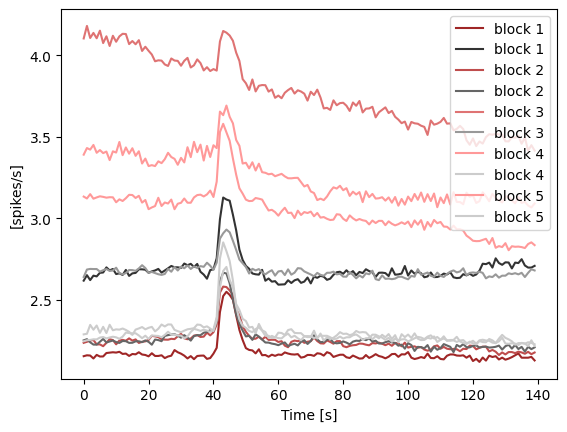

In [61]:
#plot le tracking au cours du temps : 
n_block = int(np.max([elt['Block'] for elt in features]))

from matplotlib.colors import LinearSegmentedColormap

# Créer une colormap allant du rouge foncé au rouge clair
colors = [(0.5, 0, 0), (1, 0.6, 0.6)]  # rouge foncé -> rouge clair
cmap = LinearSegmentedColormap.from_list('red_scale', colors, N=5)

colors_pb = [(0, 0, 0), (0.8, 0.8, 0.8)]  # noir -> gris clair
cmap_pb = LinearSegmentedColormap.from_list('black_gray_scale', colors_pb, N=5)

for i in range(1, 6):
    tracking = get_psth_in_block(data, features, t_pre, t_post, bin_width, gc, i, 'tracking')
    playback = get_psth_in_block(data, features, t_pre, t_post, bin_width, gc, i, 'playback')
    c_tracking = np.nanmean(tracking, axis=1)
    c_playback = np.nanmean(playback, axis=1)
    m_tracking = np.nanmean(c_tracking, axis=0)
    m_playback = np.nanmean(c_playback, axis=0)
    
    # Appliquer la couleur de l'échelle en fonction du bloc
    plt.plot(m_tracking, label=f'block {i}', color=cmap(i / 5))
    plt.plot(m_playback, label=f'block {i}', color=cmap_pb(i / 5))
plt.xlabel('Time [s]')
plt.legend()
plt.ylabel('[spikes/s]')

NameError: name 'tracking' is not defined

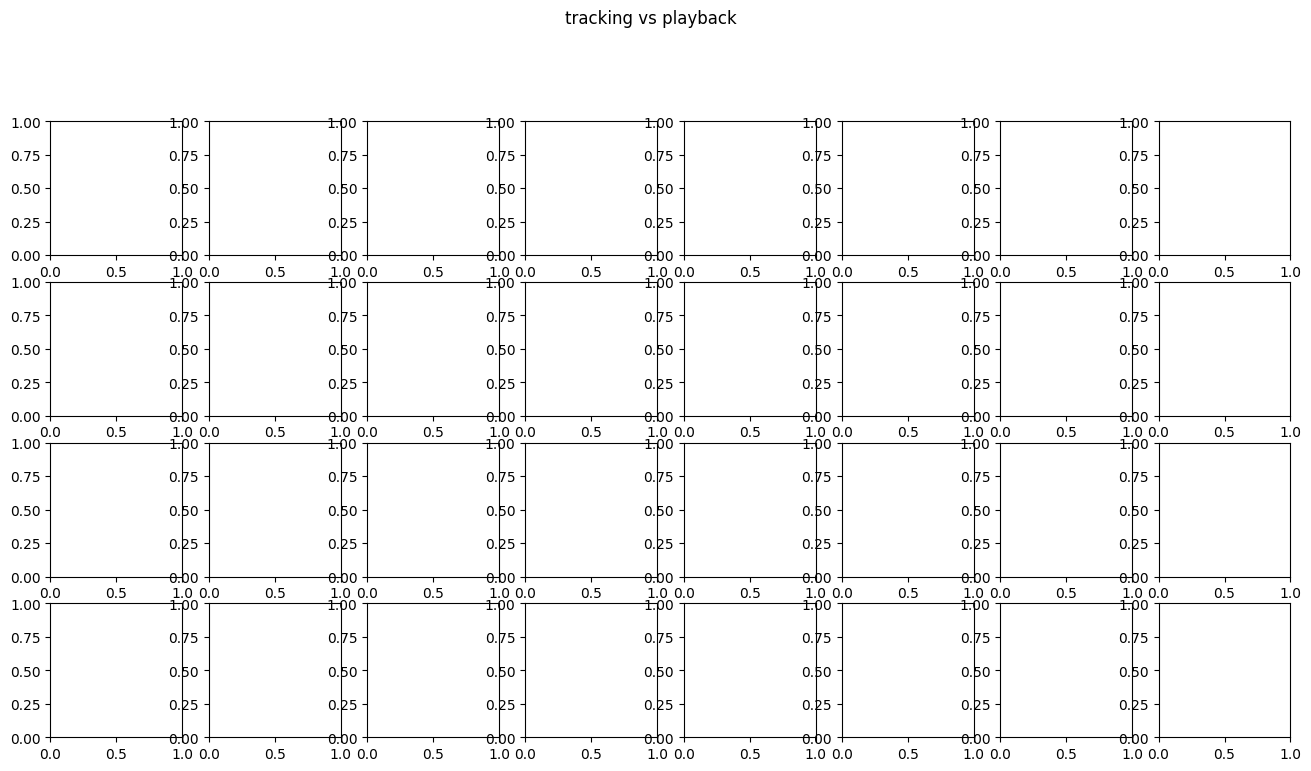

In [23]:
# Tracking vs Playback
# pour plot cluster par cluster16
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('tracking vs playback', y=1.02)
plt.subplots_adjust() 
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)
psth_bins = np.arange(-t_pre, t_post, bin_width)
for cluster in range(num_plots):
    if cluster < num_plots: 
        row, col = get_plot_coords(cluster)
        axes[row, col].plot(psth_bins, np.nanmean(tracking[cluster], axis=0), c = 'red', label = 'tracking')
        axes[row, col].plot(psth_bins, np.nanmean(playback[cluster], axis=0), c = 'black', label = 'playback')
        axes[row, col].axvline(0, c = 'grey', linestyle='--')
        axes[row, col].set_title(f'Cluster {cluster}')
        axes[row, col].spines['top'].set_visible(False)
        axes[row, col].spines['right'].set_visible(False)

In [ ]:
# Tracking vs Playback
# pour plot cluster par cluster16
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('Tracking', y=1.02)
plt.subplots_adjust() 
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)
psth_bins = np.arange(-t_pre, t_post, bin_width)
for cluster in range(num_plots):
    if cluster < num_plots: 
        row, col = get_plot_coords(cluster)
        axes[row, col].plot(psth_bins, np.nanmean(tracking[cluster], axis=0), c = 'red', label = 'tracking')
        #axes[row, col].plot(psth_bins, np.nanmean(playback[cluster], axis=0), c = 'black', label = 'playback')
        axes[row, col].axvline(0, c = 'grey', linestyle='--')
        axes[row, col].set_title(f'Cluster {cluster}')
        axes[row, col].spines['top'].set_visible(False)
        axes[row, col].spines['right'].set_visible(False)

In [ ]:
#psth in/out
tracking_in, tracking_out = get_mean_psth_in_bandwidth(data, features, bandwidth, t_pre, t_post, bin_width, gc, 'tracking')
playback_in, playback_out = get_mean_psth_in_bandwidth(data, features, bandwidth, t_pre, t_post, bin_width, gc, 'playback')

In [ ]:
# Tracking vs Playback
# pour plot cluster par cluster16
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('Tracking out vs playback out', y=1.02)
plt.subplots_adjust() 
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)
psth_bins = np.arange(-t_pre, t_post, bin_width)
for cluster in range(num_plots):
    if cluster < num_plots: 
        row, col = get_plot_coords(cluster)
        axes[row, col].plot(psth_bins, tracking_out[cluster], c = 'red', label = 'tracking')
        axes[row, col].plot(psth_bins, playback_out[cluster], c = 'black', label = 'playback')
        axes[row, col].axvline(0, c = 'grey', linestyle='--')
        axes[row, col].set_title(f'Cluster {cluster}')
        axes[row, col].spines['top'].set_visible(False)
        axes[row, col].spines['right'].set_visible(False)

In [ ]:
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('Tracking out vs playback out', y=1.02)
plt.subplots_adjust() 
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)
psth_bins = np.arange(-t_pre, t_post, bin_width)
for cluster in range(num_plots):
    if cluster < num_plots: 
        row, col = get_plot_coords(cluster)
        axes[row, col].plot(psth_bins, tracking_in[cluster], c = 'red', label = 'tracking_in')
        axes[row, col].plot(psth_bins, playback_in[cluster], c = 'black', label = 'playback_in')
        axes[row, col].plot(psth_bins, tracking_out[cluster], c = 'orange', label = 'tracking_out')
        axes[row, col].plot(psth_bins, playback_out[cluster], c = 'grey', label = 'playback_out')
        axes[row, col].axvline(0, c = 'grey', linestyle='--')
        axes[row, col].set_title(f'Cluster {cluster}')
        axes[row, col].spines['top'].set_visible(False)
        axes[row, col].spines['right'].set_visible(False)
plt.legend()

In [ ]:
# Tracking vs Playback
# pour plot cluster par cluster16
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('Tracking in vs playback in', y=1.02)
plt.subplots_adjust() 
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)
psth_bins = np.arange(-t_pre, t_post, bin_width)
for cluster in range(num_plots):
    if cluster < num_plots: 
        row, col = get_plot_coords(cluster)
        axes[row, col].plot(psth_bins, tracking_in[cluster], c = 'red', label = 'tracking')
        axes[row, col].plot(psth_bins, playback_in[cluster], c = 'black', label = 'playback')
        axes[row, col].axvline(0, c = 'grey', linestyle='--')
        axes[row, col].set_title(f'Cluster {cluster}')
        axes[row, col].spines['top'].set_visible(False)
        axes[row, col].spines['right'].set_visible(False)

In [10]:
m = int(len(data[0])/2)
first_features = features[:m]
second_features = features[m:]
first_data = np.vstack([elt[:m] for elt in data])
second_data = np.vstack([elt[m:] for elt in data])

In [ ]:
fc = [elt for elt in second_features['Frequency_changes']]

In [17]:
tr_first = get_psth(first_data, first_features, t_pre, t_post, bin_width, gc, 'tail')
tr_second = get_psth(second_data, second_features, t_pre, t_post, bin_width, gc, 'tail')

In [18]:
def get_mean_neurone_spaced_frequency_test(data, features, t_pre, t_post, bin_width, good_clusters, min_time):
    """
    Fonction qui renvoie le psth moyen (tracking et playback) par neurone
    Attention ici je ne prends que les changements de fréquence qui sont 
    séparés de plus de 200ms (pour vérifier que les oscillations sont bien
    dûes aux changements de fréquence précédents le stim d'intéret)
    --> si tu veux l'utiliser : change l'appel à la fonction dans get_mean_psth
    input: fichier data.npy d'une session, features.npy, t_post, t_pre, bin_width, fichier good_playback_clusters.npy, min_time (temps minimum entre deux changements de frequence)
    output : 2 listes [neurones, bins] pour tracking et playabck
    
    """
    tracking, playback=[], []    
    for cluster in good_clusters:
        mean_psth_tr, mean_psth_pb = [], []
        previousbin=0
        for bin in range(len(features)):
            if bin-int(t_pre/bin_width)>0 and bin+int(t_post/bin_width)<len(features):
                if features[bin]['Frequency_changes']>0 and features[bin]['Condition']==-1 and bin-previousbin>min_time/bin_width:
                    mean_psth_tr.append(data[cluster][bin-int(t_pre/bin_width):bin+int(t_post/bin_width)])
                    previousbin=bin
                if features[bin]['Frequency_changes']>0 and features[bin]['Condition']==1 and bin-previousbin>min_time/bin_width:
                    mean_psth_pb.append(data[cluster][bin-int(t_pre/bin_width):bin+int(t_post/bin_width)])
                    previousbin=bin
        tracking.append(np.nanmean(mean_psth_tr, axis=0))
        playback.append(np.nanmean(mean_psth_pb, axis=0))
    return tracking, playback

In [ ]:
sp_tr, sp_pb = get_mean_neurone_spaced_frequency_test(data, features, t_pre, t_post, bin_width, gc, 0.2)

In [ ]:
sp_tr_first, sp_pb_first = get_mean_neurone_spaced_frequency_test(first_data, first_features, t_pre, t_post, bin_width, gc, 0.2)
sp_tr_second, sp_pb_second = get_mean_neurone_spaced_frequency_test(second_data, second_features, t_pre, t_post, bin_width, gc, 0.2)

In [ ]:
for elt in sp_tr:
    plt.plot(psth_bins, elt)

In [ ]:
len(sp_tr_first)

In [ ]:
# pour plot cluster par cluster16
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('Tracking only spaced frequency changes', y=1.02)
plt.subplots_adjust() 
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)
psth_bins = np.arange(-t_pre, t_post, bin_width)
for cluster in range(num_plots):
    if cluster < num_plots: 
        row, col = get_plot_coords(cluster)
        axes[row, col].plot(psth_bins, sp_tr[cluster], c = 'red', label = 'tracking')
        axes[row, col].axvline(0, c = 'grey', linestyle='--')
        axes[row, col].set_title(f'Cluster {cluster}')
        axes[row, col].spines['top'].set_visible(False)
        axes[row, col].spines['right'].set_visible(False)
plt.legend()

In [ ]:
# pour plot cluster par cluster16
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('Tracking only', y=1.02)
plt.subplots_adjust() 
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)
psth_bins = np.arange(-t_pre, t_post, bin_width)
for cluster in range(num_plots):
    if cluster < num_plots: 
        row, col = get_plot_coords(cluster)
        axes[row, col].plot(psth_bins, np.nanmean(tr_first[cluster], axis=0), c = 'orange', label = 'first half')
        axes[row, col].plot(psth_bins, np.nanmean(tr_second[cluster], axis=0), c = 'red', label = 'second half')
        axes[row, col].axvline(0, c = 'grey', linestyle='--')
        axes[row, col].set_title(f'Cluster {cluster}')
        axes[row, col].spines['top'].set_visible(False)
        axes[row, col].spines['right'].set_visible(False)
plt.legend()

In [ ]:


m_first = np.nanmean(pb_first, axis=1)
first = np.nanmean(m_first, axis=0)

m_second = np.nanmean(pb_second, axis=1)
second = np.nanmean(m_second, axis=0)

sem_first_part = get_sem(m_first)
sem_second_part = get_sem(m_second)

# Calculer le test t pour chaque bin
#t_stat, p_value = stats.ttest_rel(m_first, m_second, axis=0)

# Interprétation globale
#alpha = 0.05
#significant_bins = p_value < alpha 
#print(f"Nombre de bins significatifs : {np.sum(significant_bins)}")
#if np.sum(significant_bins)==140:
#    print('significative difference')
#else:
#    print('no significative difference')
    


plt.plot(psth_bins, first, c = 'orange', label = 'First half')
plt.plot(psth_bins, second, c = 'red',  label = 'Second half')
plt.fill_between(psth_bins, first - sem_first_part, first + sem_first_part, color='orange', alpha=0.2)
plt.fill_between(psth_bins, second - sem_second_part, second + sem_second_part, color='red', alpha=0.2)
plt.title('Evolution of playback (Average over all clusters)')
plt.xlabel('Time [s]')
plt.ylabel('[spikes/s]')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()


In [23]:

tail = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tail')
tracking = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tracking')
#mc = get_psth(data, features, t_pre, t_post, bin_width, gc, 'mapping change')
playback = get_psth(data, features, t_pre, t_post, bin_width, gc, 'playback') 

In [ ]:
playback

In [ ]:
# pour plot cluster par cluster16
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('tracking', y=1.02)
plt.subplots_adjust() 
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)
psth_bins = np.arange(-t_pre, t_post, bin_width)
for cluster in range(num_plots):
    if cluster < num_plots: 
        row, col = get_plot_coords(cluster)
        #axes[row, col].plot(psth_bins, np.nanmean(tracking[cluster], axis=0), c = 'red')
        axes[row, col].plot(psth_bins, np.nanmean(tail[cluster], axis=0), c = 'red')
        axes[row, col].axvline(0, c = 'grey', linestyle='--')
        axes[row, col].set_title(f'Cluster {cluster}')
        axes[row, col].spines['top'].set_visible(False)
        axes[row, col].spines['right'].set_visible(False)

In [26]:
c_tracking = np.nanmean(tail, axis=0)

m_tracking = np.nanmean(c_tracking, axis=0)

In [ ]:
plt.plot(psth_bins, m_tracking, c = 'red', label = 'tracking')
#plt.plot(psth_bins, m_playback, c = 'black',  label = 'playback')
#plt.fill_between(psth_bins, m_tracking - sem_tr, m_tracking + sem_tr, color='red', alpha=0.2)
#plt.fill_between(psth_bins, m_playback - sem_pb, m_playback + sem_pb, color='black', alpha=0.2)
plt.title('Tracking (Average over all clusters)')
plt.xlabel('Time [s]')
plt.ylabel('[spikes/s]')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

# Créer une colormap allant du rouge foncé au rouge clair
colors = [(0.5, 0, 0), (1, 0.6, 0.6)]  # rouge foncé -> rouge clair
cmap = LinearSegmentedColormap.from_list('red_scale', colors, N=5)

for i in range(1, 6):
    tracking = get_psth_in_block(data, features, t_pre, t_post, bin_width, gc, i, 'tracking')
    #playback = get_psth_in_block(data, features, t_pre, t_post, bin_width, gc, i, 'playback')
    c_tracking = np.nanmean(tracking, axis=1)
    #c_playback = np.nanmean(playback, axis=1)
    m_tracking = np.nanmean(c_tracking, axis=0)
    #m_playback = np.nanmean(c_playback, axis=0)
    
    # Appliquer la couleur de l'échelle en fonction du bloc
    plt.plot(m_tracking, label=f'block {i}', color=cmap(i / 5))
plt.xlabel('Time [s]')
plt.ylabel('[spikes/s]')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.title('Evolution of tracking block by block')
plt.show()

In [ ]:
# Créer une colormap allant du noir au gris clair
colors = [(0, 0, 0), (0.8, 0.8, 0.8)]  # noir -> gris clair
cmap = LinearSegmentedColormap.from_list('gray_scale', colors, N=5)

for i in range(1, 6):
    #tracking = get_psth_in_block(data, features, t_pre, t_post, bin_width, gc, i, 'tracking')
    playback = get_psth_in_block(data, features, t_pre, t_post, bin_width, gc, i, 'playback')
    #c_tracking = np.nanmean(tracking, axis=1)
    c_playback = np.nanmean(playback, axis=1)
    #m_tracking = np.nanmean(c_tracking, axis=0)
    m_playback = np.nanmean(c_playback, axis=0)
    
    # Appliquer la couleur de l'échelle en fonction du bloc
    plt.plot(m_playback, label=f'block {i}', color=cmap(i / 5))

plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('[spikes/s]')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Evolution of playback block by block')
plt.show()


In [26]:
np.save(path+'headstage_0/psth_tracking_0.005.npy', tracking)
np.save(path+'headstage_0/psth_playback_0.005.npy', playback)
#np.save(path+'headstage_0/psth_mappingchange_0.005.npy', mc) 
np.save(path+'headstage_0/psth_tail_0.005.npy', tail)

In [27]:
tracking = np.load(path+'headstage_0/psth_tracking_0.005.npy', allow_pickle=True)
#mc = np.load(path+'headstage_0/psth_mappingchange_0.005.npy', allow_pickle=True)
tail = np.load(path+'headstage_0/psth_tail_0.005.npy', allow_pickle=True)
playback = np.load(path+'headstage_0/psth_playback_0.005.npy', allow_pickle=True)

In [28]:
bandwidth = np.load(path+'headstage_0/heatmap_bandwidth.npy', allow_pickle=True)


In [ ]:
get_psth_in_block(data, features, t_pre, t_post, bin_width, good_clusters, block, condition)

In [ ]:
# pour plot cluster par cluster16
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('playback', y=1.02)
plt.subplots_adjust() 
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)
psth_bins = np.arange(-t_pre, t_post, bin_width)
for cluster in range(num_plots):
    if cluster < num_plots: 
        row, col = get_plot_coords(cluster)
        #axes[row, col].plot(psth_bins, np.nanmean(tracking[cluster], axis=0), c = 'red')
        axes[row, col].plot(psth_bins, np.nanmean(playback[cluster], axis=0), c = 'black')
        axes[row, col].axvline(0, c = 'grey', linestyle='--')
        axes[row, col].set_title(f'Cluster {cluster}')
        axes[row, col].spines['top'].set_visible(False)
        axes[row, col].spines['right'].set_visible(False)

In [ ]:
# faire le meme plot mais block par block pour voir si des le debut ca monte comme ca...

In [ ]:
print('salut')

In [ ]:
c_tracking = np.nanmean(tracking, axis=0)
c_playback = np.nanmean(playback, axis=0)

m_tracking = np.nanmean(c_tracking, axis=0)
m_playback = np.nanmean(c_playback, axis=0)

In [ ]:
plt.xlabel('Time [s]')
plt.ylabel('[spikes/s]')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
sem_tr = get_sem(c_tracking)
sem_pb = get_sem(c_playback)

In [ ]:


# Calculer le test t pour chaque bin
#t_stat, p_value = stats.ttest_rel(m_first, m_second, axis=0)

# Interprétation globale
#alpha = 0.05
#significant_bins = p_value < alpha 
#print(f"Nombre de bins significatifs : {np.sum(significant_bins)}")
#if np.sum(significant_bins)==140:
#    print('significative difference')
#else:
#    print('no significative difference')
    


plt.plot(psth_bins, m_tracking, c = 'red', label = 'tracking')
plt.plot(psth_bins, m_playback, c = 'black',  label = 'playback')
plt.fill_between(psth_bins, m_tracking - sem_tr, m_tracking + sem_tr, color='red', alpha=0.2)
plt.fill_between(psth_bins, m_playback - sem_pb, m_playback + sem_pb, color='black', alpha=0.2)
plt.title('Tracking vs playback (Average over all clusters)')
plt.xlabel('Time [s]')
plt.ylabel('[spikes/s]')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()

In [ ]:
# je sépare en deux la session (autant de triggers dans la partie 1 que 2)
n = int(len(playback[0])/2)
first_part = [psth[:n] for psth in tracking]
second_part = [psth[n:] for psth in tracking]

# pour plot cluster par cluster
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)

fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('tracking divided in 2 parts', y=1.02)
fig.legend()
plt.subplots_adjust() 

for cluster in range(num_plots):
    if cluster < num_plots: 
        row, col = get_plot_coords(cluster)
        axes[row, col].plot(psth_bins, np.nanmean(first_part[cluster], axis=0), c = 'orange', label = 'First half tracking')
        axes[row, col].plot(psth_bins, np.nanmean(second_part[cluster], axis=0), c = 'red', label = 'Second half tracking')
        axes[row, col].axvline(0, c = 'grey', linestyle='--')
        axes[row, col].set_title(f'Cluster {cluster}')
        axes[row, col].spines['top'].set_visible(False)
        axes[row, col].spines['right'].set_visible(False)
fig.legend(['First half tracking', 'Second half tracking'], loc='upper right', bbox_to_anchor=(1, 0.95))


In [ ]:
# je sépare en deux la session (autant de triggers dans la partie 1 que 2)
n = int(len(playback[0])/2)
first_part_playback = [psth[:n] for psth in playback]
second_part_playback = [psth[n:] for psth in playback]

# pour plot cluster par cluster
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)

fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('playback divided in 2 parts', y=1.02)
fig.legend()
plt.subplots_adjust() 

for cluster in range(num_plots):
    if cluster < num_plots: 
        row, col = get_plot_coords(cluster)
        axes[row, col].plot(psth_bins, np.nanmean(first_part_playback[cluster], axis=0), c = 'grey', label = 'First half playback')
        axes[row, col].plot(psth_bins, np.nanmean(second_part_playback[cluster], axis=0), c = 'black', label = 'Second half playback')
        axes[row, col].axvline(0, c = 'grey', linestyle='--')
        axes[row, col].set_title(f'Cluster {cluster}')
        axes[row, col].spines['top'].set_visible(False)
        axes[row, col].spines['right'].set_visible(False)
fig.legend(['First half playback', 'Second half playback'], loc='upper right', bbox_to_anchor=(1, 0.95))

In [ ]:
tracking_in, tracking_out = get_mean_psth_in_bandwidth(data, features, bandwidth, t_pre, t_post, bin_width, gc, 'tracking')
playback_in, playback_out = get_mean_psth_in_bandwidth(data, features, bandwidth, t_pre, t_post, bin_width, gc, 'playback')

In [ ]:

num_plots, num_rows, num_columns = get_better_plot_geometry(first_pb_in)
print(num_plots)
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('playback clusters', y=1.02)
fig.legend()
plt.subplots_adjust() 

for cluster in range(num_plots):
    if cluster < num_plots: 
        row, col = get_plot_coords(cluster)
        axes[row, col].plot(psth_bins, first_pb_in[cluster], c = 'grey', label = 'in first bandwidth')
        axes[row, col].plot(psth_bins, second_pb_in[cluster], c = 'black', label = 'in second bandwidth')
        axes[row, col].axvline(0, c = 'grey', linestyle='--')
        axes[row, col].set_title(f'Cluster {cluster}')
        axes[row, col].spines['top'].set_visible(False)
        axes[row, col].spines['right'].set_visible(False)
fig.legend(['in first', 'in second'], loc='upper right', bbox_to_anchor=(1, 0.95))

In [ ]:
plt.plot(psth_bins, first, c = 'grey', label = 'First half')
plt.plot(psth_bins, second, c = 'black',  label = 'Second half')
plt.fill_between(psth_bins, first - sem_first_part, first + sem_first_part, color='grey', alpha=0.2)
plt.fill_between(psth_bins, second - sem_second_part, second + sem_second_part, color='black', alpha=0.2)
plt.title('Evolution of playback (Average over all clusters)')
plt.xlabel('Time [s]')
plt.ylabel('[spikes/s]')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()

In [ ]:
#plot tracking vs playbact_stat, p_value = stats.ttest_rel(avant, apres)k moyenné sur tous les clusters 
first_part = [psth[:n] for psth in playback]
second_part = [psth[n:] for psth in playback]

m_first = np.nanmean(first_part, axis=1)
first = np.nanmean(m_first, axis=0)

m_second = np.nanmean(second_part, axis=1)
second = np.nanmean(m_second, axis=0)

sem_first_part = get_sem(m_first)
sem_second_part = get_sem(m_second)

# Calculer le test t pour chaque bin
#t_stat, p_value = stats.ttest_rel(m_first, m_second, axis=0)

# Interprétation globale
#alpha = 0.05
#significant_bins = p_value < alpha 
#print(f"Nombre de bins significatifs : {np.sum(significant_bins)}")
#if np.sum(significant_bins)==140:
#    print('significative difference')
#else:
#    print('no significative difference')
    


plt.plot(psth_bins, first, c = 'grey', label = 'First half')
plt.plot(psth_bins, second, c = 'black',  label = 'Second half')
plt.fill_between(psth_bins, first - sem_first_part, first + sem_first_part, color='grey', alpha=0.2)
plt.fill_between(psth_bins, second - sem_second_part, second + sem_second_part, color='black', alpha=0.2)
plt.title('Evolution of playback (Average over all clusters)')
plt.xlabel('Time [s]')
plt.ylabel('[spikes/s]')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()


In [ ]:
#plot tracking vs playbact_stat, p_value = stats.ttest_rel(avant, apres)k moyenné sur tous les clusters 
first_part_tracking = [psth[:n] for psth in tracking]
second_part_tracking = [psth[n:] for psth in tracking]

m_first_tracking = np.nanmean(first_part_tracking, axis=1)
first_tracking = np.nanmean(m_first_tracking, axis=0)

m_second_tracking = np.nanmean(second_part_tracking, axis=1)
second_tracking = np.nanmean(m_second_tracking, axis=0)

sem_first_part_tracking = get_sem(m_first_tracking)
sem_second_part_tracking = get_sem(m_second_tracking)

# Calculer le test t pour chaque bin
#t_stat, p_value = stats.ttest_rel(m_first, m_second, axis=0)

# Interprétation globale
#alpha = 0.05
#significant_bins = p_value < alpha 
#print(f"Nombre de bins significatifs : {np.sum(significant_bins)}")
#if np.sum(significant_bins)==140:
#    print('significative difference')
#else:
#    print('no significative difference')
    


plt.plot(psth_bins, first_tracking, c = 'orange', label = 'First half')
plt.plot(psth_bins, second_tracking, c = 'red',  label = 'Second half')
plt.fill_between(psth_bins, first_tracking - sem_first_part_tracking, first_tracking + sem_first_part_tracking, color='orange', alpha=0.2)
plt.fill_between(psth_bins, second_tracking - sem_second_part_tracking, second_tracking + sem_second_part_tracking, color='red', alpha=0.2)
plt.title('Evolution of tracking (Average over all clusters)')
plt.xlabel('Time [s]')
plt.ylabel('[spikes/s]')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()


In [ ]:
# Comparer les psth en début de session et fin de session ou toutes les 5 min
print('jai tourné')
 

In [ ]:
# comparer le cas où le furet arrive de la droite ou de la gauche
indices_frequency_changes = []

# Parcourir le tableau et vérifier la condition
for i, item in enumerate(features):
    if item['Frequency_changes']:
        indices_frequency_changes.append(i)
        

indices_increase = []
indices_decrease = []

# Parcourir les indices pour diviser en deux groupes
for idx in indices_frequency_changes:
    # Vérifier si l'indice précédent existe
    if idx > 0:
        prev_played_freq = features[idx - 1]['Played_frequency']
        curr_played_freq = features[idx]['Played_frequency']
        
        if prev_played_freq < curr_played_freq:
            indices_increase.append(idx)
        elif prev_played_freq > curr_played_freq:
            indices_decrease.append(idx)


In [ ]:
tr_decrease = get_psth_for_indexes(data, features, indices_decrease, t_pre, t_post, bin_width, gc, 'tracking')
tr_increase = get_psth_for_indexes(data, features, indices_increase, t_pre, t_post, bin_width, gc, 'tracking')
pb_decrease = get_psth_for_indexes(data, features, indices_decrease, t_pre, t_post, bin_width, gc, 'playback')
pb_increase = get_psth_for_indexes(data, features, indices_increase, t_pre, t_post, bin_width, gc, 'playback')